In [71]:
%matplotlib notebook
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy
import cartopy.crs as ccrs
import os
from pynextsim.projection_info import ProjectionInfo
import cmocean as cm
import datetime as dt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.colorbar import colorbar
import matplotlib.ticker as mticker


def prepare_grid(ds):
    
    # Get x-y grid from model
    lons = ds.longitude[:]
    lats = ds.latitude[:]
    x,y=proj.pyproj(lons.values, lats.values) # init grid using x,y coords of grid
    x_extent = [(x,y)[0][0][0], (x,y)[0][0][-1]]
    y_extent = [(x,y)[1][0][0], (x,y)[1][-1][0]]
    ex_lim=1
    x_extent = [(x,y)[0][0][ex_lim], (x,y)[0][0][-ex_lim]]
    y_extent = [(x,y)[1][ex_lim][0], (x,y)[1][-ex_lim][0]]

    grid = dict(
        proj=proj,
        x_extent=x_extent,
        y_extent=y_extent,
        )

    return grid

def plotmap():
    
    ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-140))
    ax.add_feature(cartopy.feature.LAND,zorder=1,alpha=0.7, color="darkgrey")
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.set_aspect(1)
    gl = ax.gridlines(zorder=2,linewidth=0.5, alpha=0.5,linestyle="--", draw_labels=False)
    ax.set_extent([-167, -120, 67, 79], ccrs.PlateCarree())

    gl.xlocator = mticker.FixedLocator([120, 140, 160, 180, -160, -140, -120])
    gl.ylocator = mticker.FixedLocator([65, 70, 75, 80])
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    
    return ax


def main():
    
    grid = prepare_grid(ds)
    clevs = np.arange(0, 90+1, 1) # for sic
    cbargs = {"ticks": [0, 90],  "orientation":"horizontal"}
    
    # make figure
    fig = plt.figure(figsize=(4, 3))
    
    # set background map
    ax = plotmap();
    
    axpos=ax.get_position().get_points()
    for i in range(t1,t2):

        cs = ax.contourf(sic_thin[i], zorder=1,  extent=[*grid['x_extent'], *grid['y_extent']],
                 levels=clevs, cmap=cm.cm.ice_r, extend='both', transform=grid['proj'].crs)

        # set titles
        datestr = dt.datetime.strftime(time[i], "%Y-%m-%d %H:%M")
        ax.set_title(datestr, x=0.5,y= axpos[1,0]-0.06, fontsize=12)
        #ax.text(0.5,0.92,datestr,horizontalalignment='center',
        #    transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='None', alpha=0.))

        # add colorbar
        cax = inset_axes(ax,
                        width="40%",  # width = 50% of parent_bbox width
                        height="3%",  # height : 5%
                        loc='lower left',
                        bbox_to_anchor=(axpos[0,0]+0.05, axpos[1,0]-axpos[1,1]+0.05, 1, 1),
                        bbox_transform=ax.transAxes,
                        borderpad=0)

        cbar = plt.colorbar(cs, cax=cax, **cbargs)
        #cbar.ax.set_title("Lead fraction [%]", fontsize=10)
        cbar.ax.tick_params(labelsize=10, size=0) 
        cbar.ax.set_xticklabels(['sea ice', 'open-ocean']) 

        # save figure
        figname = outpath_plots+'leadfraction_beaufort' + str(dt.datetime.strftime(time[i],'%Y%m%d-%H:%M')) + '.png'
        print("saving ", figname)
#        fig.savefig(figname, dpi=200, bbox_inches='tight')   

    return ax



<IPython.core.display.Javascript object>


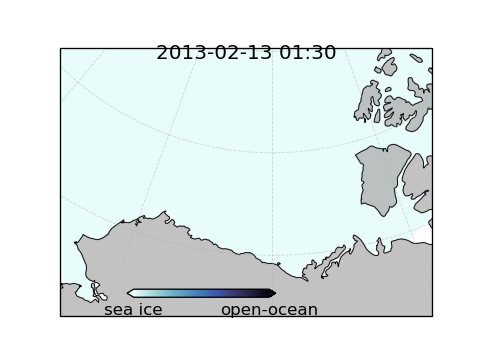

saving  /cluster/home/rheinlender/projects/aoi_case_study/breakup-paper/breakup-animation/320x240/leadfraction_beaufort20130213-01:30.png


In [2]:
# Run Main
plt.close('all')
outpath_plots = '/cluster/home/rheinlender/projects/aoi_case_study/breakup-paper/breakup-animation/320x240/'

# Open Mooring
fl = '/cluster/projects/nn9624k/rheinlender/breakup2013/data/wrf-exp/start_20130213_nudging/expt_01_wrf10/outputs-v11/Moorings.nc'
ds = xr.load_dataset(fl)

# Compute Thin ice conc + open water
sic_thin = 1-ds['sic'] + ds['sic_thin']
sic_thin = sic_thin*100 # in %

time = ds['time'].time.values.astype('datetime64[ms]').astype('O')

t1 = 0
t2 = 1
#t2 = sic_thin.shape[0]

proj = ProjectionInfo() # default nextsim projection



<IPython.core.display.Javascript object>


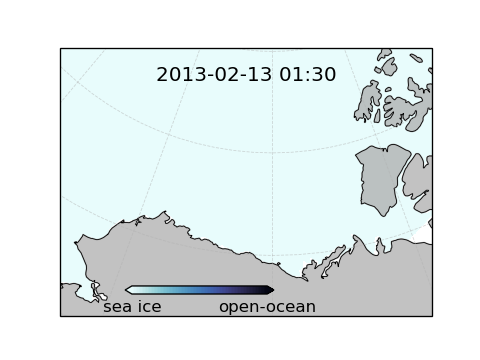

saving  /cluster/home/rheinlender/projects/aoi_case_study/breakup-paper/breakup-animation/320x240/leadfraction_beaufort20130213-01:30.png


In [72]:
ax= main()

In [65]:
axpos=ax.get_position().get_points()
[x0,x1], [y0,y1]=axpos
print(y1)
ax.set_title('title',x=0.5,y= y0-0.06)

0.8679080561396904


Text(0.5, 0.8400000000000001, 'title')

In [70]:
axpos[1,0]-axpos[1,1]

0.03209194386030967